# KEGG ROC new Train (text data) SGD optimizer

## Import data

In [1]:
import numpy as np

pdata1 = np.load('Adam_model1/end_y_predict.npy')
print(pdata1.shape)

odata1 = np.load('Adam_model1/end_y_test.npy')
print(odata1.shape)

pdata2 = np.load('Adam_model2/end_y_predict.npy')
print(pdata2.shape)

odata2 = np.load('Adam_model2/end_y_test.npy')
print(odata2.shape)

pdata3 = np.load('Adam_model3/end_y_predict.npy')
print(pdata3.shape)

odata3 = np.load('Adam_model3/end_y_test.npy')
print(odata3.shape)

n_classes1 = pdata1.shape[1]
n_classes2 = pdata2.shape[1]
n_classes3 = pdata3.shape[1]

(30408, 3)
(30408, 3)
(25377, 3)
(25377, 3)
(36657, 3)
(36657, 3)


## ROC curve and AUC

In [2]:
from sklearn import metrics

fpr1 = []
tpr1 = []
roc_auc1 = []
for i in range(n_classes1):
    ftemp, ttemp, _ = metrics.roc_curve(odata1[:,i], pdata1[:,i])
    fpr1.append(ftemp)
    tpr1.append(ttemp)
    roc_auc1.append(metrics.auc(fpr1[i], tpr1[i]))

print(roc_auc1)

fpr2 = []
tpr2 = []
roc_auc2 = []
for i in range(n_classes2):
    ftemp, ttemp, _ = metrics.roc_curve(odata2[:,i], pdata2[:,i])
    fpr2.append(ftemp)
    tpr2.append(ttemp)
    roc_auc2.append(metrics.auc(fpr2[i], tpr2[i]))

print(roc_auc2)

fpr3 = []
tpr3 = []
roc_auc3 = []
for i in range(n_classes3):
    ftemp, ttemp, _ = metrics.roc_curve(odata3[:,i], pdata3[:,i])
    fpr3.append(ftemp)
    tpr3.append(ttemp)
    roc_auc3.append(metrics.auc(fpr3[i], tpr3[i]))

print(roc_auc3)

roc_auc = []
for i in range(3):
    roc_auc.append(np.mean([roc_auc1[i], roc_auc2[i], roc_auc3[i]], dtype=float))
print(roc_auc)

[0.7531045957690484, 0.7037535837589057, 0.7303048070705649]
[0.8529267009100354, 0.8037846084451135, 0.8111301830833401]
[0.6877594208635899, 0.6295561324726007, 0.6734488644946264]
[0.7645969058475579, 0.7123647748922067, 0.738294618216177]


## Plot ROC curve

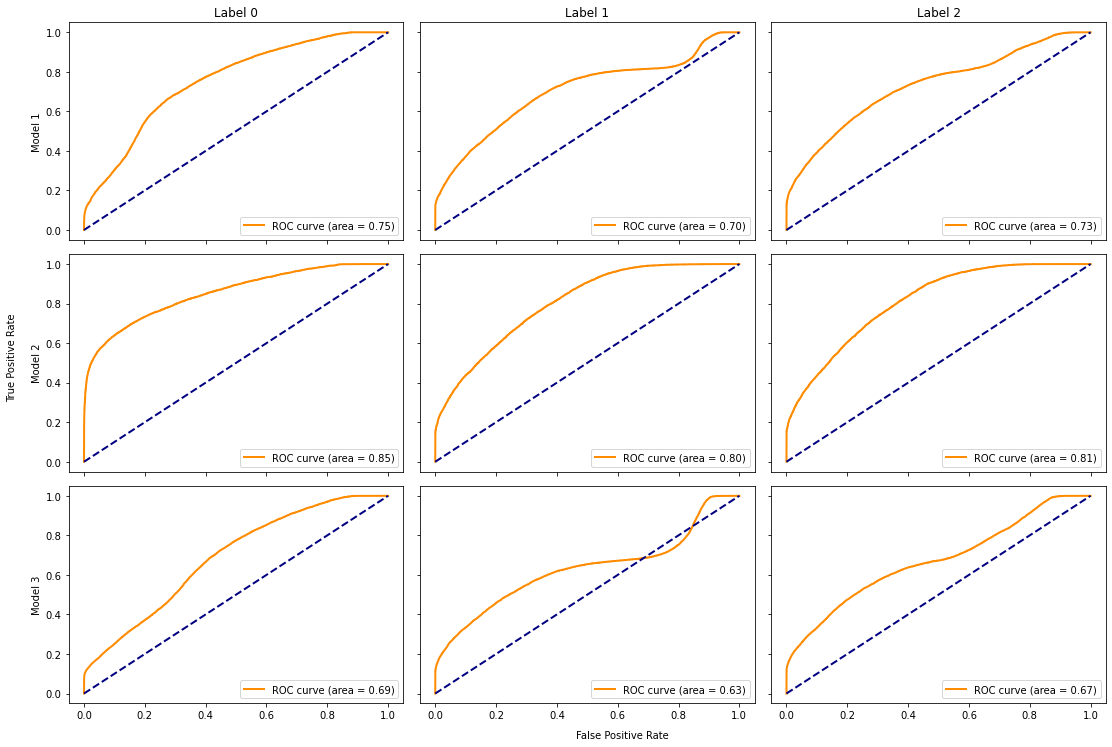

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, constrained_layout=True)
fig.set_figwidth(15)
fig.set_figheight(10)
lw = 2
axs[0,0].plot(
    fpr1[0],
    tpr1[0],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc1[0],
)
axs[0,0].plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

axs[0,1].plot(
    fpr1[1],
    tpr1[1],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc1[1],
)
axs[0,1].plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

axs[0,2].plot(
    fpr1[2],
    tpr1[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc1[2],
)
axs[0,2].plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

axs[1,0].plot(
    fpr2[0],
    tpr2[0],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc2[0],
)
axs[1,0].plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

axs[1,1].plot(
    fpr2[1],
    tpr2[1],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc2[1],
)
axs[1,1].plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

axs[1,2].plot(
    fpr2[2],
    tpr2[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc2[2],
)
axs[1,2].plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

axs[2,0].plot(
    fpr3[0],
    tpr3[0],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc3[0],
)
axs[2,0].plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

axs[2,1].plot(
    fpr3[1],
    tpr3[1],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc3[1],
)
axs[2,1].plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

axs[2,2].plot(
    fpr3[2],
    tpr3[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc3[2],
)
axs[2,2].plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

axs[0,0].set_title('Label 0')
axs[0,0].legend(loc = 'lower right')
axs[0,1].set_title('Label 1')
axs[0,1].legend(loc = 'lower right')
axs[0,2].set_title('Label 2')
axs[0,2].legend(loc = 'lower right')
# axs[1,0].set_title('Label 0')
axs[1,0].legend(loc = 'lower right')
# axs[1,1].set_title('Label 1')
axs[1,1].legend(loc = 'lower right')
# axs[1,2].set_title('Label 2')
axs[1,2].legend(loc = 'lower right')
# axs[2,0].set_title('Label 0')
axs[2,0].legend(loc = 'lower right')
# axs[2,1].set_title('Label 1')
axs[2,1].legend(loc = 'lower right')
# axs[2,2].set_title('Label 2')
axs[2,2].legend(loc = 'lower right')

axs[0,0].set(ylabel='Model 1')
axs[1,0].set(ylabel='Model 2')
axs[2,0].set(ylabel='Model 3')
fig.text(0.55, -0.02, 'False Positive Rate', ha='center')
fig.text(-0.02, 0.45, 'True Positive Rate', rotation='vertical')
plt.savefig('Adam_models.png')
plt.show()